# Problem statement

1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [1]:
#nltk.download('stopwords') 
#pip install -U textblob

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import spacy
import re
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer 
import nltk
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the dataset
elon=pd.read_csv("Elon_musk.csv",encoding='cp1252')

# EDA

In [4]:
elon.head()

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [5]:
elon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


#### Removing spaces and symbol

In [6]:
 # to remoce space and symbols
elon.Text=elon.Text.apply(lambda x: re.sub('[^a-zA-Z ]', "", x))

In [7]:
elon.Text

0                                      kunalb Im an alien
1       IDAACarmack Ray tracing on Cyberpunk with HDR ...
2                        joerogan Spotify Great interview
3                            gtera Doge is underestimated
4       teslacn Congratulations Tesla China for amazin...
                              ...                        
1994    flcnhvy True it sounds so surreal but the nega...
1995    PPathole Make sure to read ur terms amp condit...
1996                    TeslaGong PPathole Samwise Gamgee
1997               PPathole Altho Dumb and Dumber is UFUF
1998                              Progress update August 
Name: Text, Length: 1999, dtype: object

In [8]:
re.sub('[^a-zA-Z ]', "", "I am cool you know $$$$ ;") # for checking purpose that how the code works

'I am cool you know  '

In [9]:
elon.head()

,Unnamed: 0,Text
0,1,kunalb Im an alien
1,2,IDAACarmack Ray tracing on Cyberpunk with HDR ...
2,3,joerogan Spotify Great interview
3,4,gtera Doge is underestimated
4,5,teslacn Congratulations Tesla China for amazin...


#### Making text to lower

In [10]:
elon.Text=elon.Text.apply(lambda x: x.lower()) # used to make text into lower case

In [11]:
elon.head()

,Unnamed: 0,Text
0,1,kunalb im an alien
1,2,idaacarmack ray tracing on cyberpunk with hdr ...
2,3,joerogan spotify great interview
3,4,gtera doge is underestimated
4,5,teslacn congratulations tesla china for amazin...


In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Splitting the words from line

In [13]:
elon.Text=elon.Text.apply(lambda x: x.split())

In [14]:
elon.head()

,Unnamed: 0,Text
0,1,"[kunalb, im, an, alien]"
1,2,"[idaacarmack, ray, tracing, on, cyberpunk, wit..."
2,3,"[joerogan, spotify, great, interview]"
3,4,"[gtera, doge, is, underestimated]"
4,5,"[teslacn, congratulations, tesla, china, for, ..."


#### Removing Stopwords

In [15]:
elon.Text=elon.Text.apply(lambda x: [word  for word in x if word not in set(stopwords.words('english'))])

In [16]:
elon.head()

,Unnamed: 0,Text
0,1,"[kunalb, im, alien]"
1,2,"[idaacarmack, ray, tracing, cyberpunk, hdr, ne..."
2,3,"[joerogan, spotify, great, interview]"
3,4,"[gtera, doge, underestimated]"
4,5,"[teslacn, congratulations, tesla, china, amazi..."


In [17]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

#### Stemming

In [18]:
ps = PorterStemmer()  
elon.Text=elon.Text.apply(lambda x: [ps.stem(word) for word in x])

In [19]:
elon.Text.head()

0                                  [kunalb, im, alien]
1    [idaacarmack, ray, trace, cyberpunk, hdr, next...
2                [joerogan, spotifi, great, interview]
3                            [gtera, doge, underestim]
4    [teslacn, congratul, tesla, china, amaz, execu...
Name: Text, dtype: object

#### Rejoining

In [20]:
elon.Text=elon.Text.apply(lambda x: " ".join(x))

In [21]:
elon.Text

0                                         kunalb im alien
1       idaacarmack ray trace cyberpunk hdr nextlevel tri
2                        joerogan spotifi great interview
3                                   gtera doge underestim
4       teslacn congratul tesla china amaz execut last...
                              ...                        
1994    flcnhvi true sound surreal neg propaganda stil...
1995    ppathol make sure read ur term amp condit clic...
1996                       teslagong ppathol samwis gamge
1997                       ppathol altho dumb dumber ufuf
1998                                progress updat august
Name: Text, Length: 1999, dtype: object

# Sentiment Analysis

In [22]:
elon['sentiment'] = elon['Text'].apply(lambda x:TextBlob(x).sentiment[0] )
elon[['Text','sentiment']].head()
# TextBlob(x).sentiment[1] = sentiment[1]= negative and positive [0], only positive=[1]

,Text,sentiment
0,kunalb im alien,-0.25
1,idaacarmack ray trace cyberpunk hdr nextlevel tri,0.00
2,joerogan spotifi great interview,0.80
3,gtera doge underestim,0.00
4,teslacn congratul tesla china amaz execut last...,0.00


In [23]:
elon.sentiment

0      -0.250000
1       0.000000
2       0.800000
3       0.000000
4       0.000000
          ...   
1994    0.186667
1995    0.500000
1996    0.000000
1997   -0.375000
1998    0.000000
Name: sentiment, Length: 1999, dtype: float64

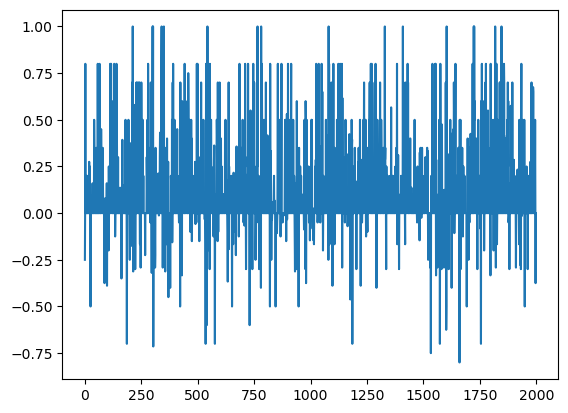

In [24]:
plt.plot(elon.sentiment)

In [25]:
elon

,Unnamed: 0,Text,sentiment
0,1,kunalb im alien,-0.250000
1,2,idaacarmack ray trace cyberpunk hdr nextlevel tri,0.000000
2,3,joerogan spotifi great interview,0.800000
3,4,gtera doge underestim,0.000000
4,5,teslacn congratul tesla china amaz execut last...,0.000000
...,...,...,...
1994,1995,flcnhvi true sound surreal neg propaganda stil...,0.186667
1995,1996,ppathol make sure read ur term amp condit clic...,0.500000
1996,1997,teslagong ppathol samwis gamge,0.000000
1997,1998,ppathol altho dumb dumber ufuf,-0.375000


In [26]:
elon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1999 non-null   int64  
 1   Text        1999 non-null   object 
 2   sentiment   1999 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 47.0+ KB


In [27]:
# Convert SentimentScore column to float
elon['sentiment'] = elon['sentiment'].astype(float)

# Create SentimentCategory column
elon['SentimentCategory'] = 'Neutral'
# dividing the values as per sentiment 
for index, row in elon.iterrows():
    if row['sentiment'] > 0.25:
        elon.at[index, 'SentimentCategory'] = 'Positive'
    elif row['sentiment'] < -0.25:
        elon.at[index, 'SentimentCategory'] = 'Negative'



<AxesSubplot:xlabel='SentimentCategory', ylabel='count'>

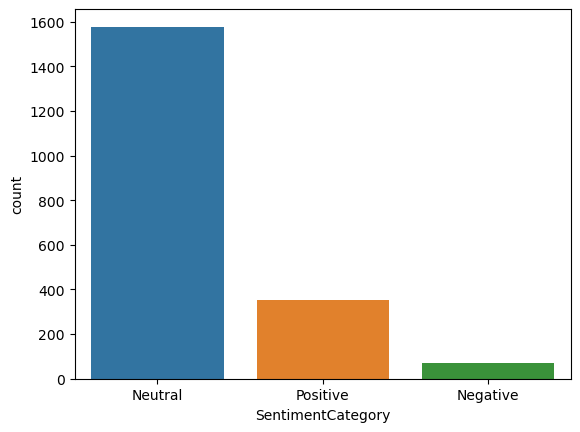

In [28]:
sns.countplot(x=elon.SentimentCategory)

# Inference 
as we can see that the neutral count is very high and positive count is the second. the negative sentiments are low

# problem statement
#### 1) Extract reviews of any product from ecommerce website like amazon
#### 2) Perform emotion mining


In [29]:
import requests
from bs4 import BeautifulSoup

# Scraping reviews using BeautifulSoup

In [57]:
link="https://www.amazon.in/Airdopes-141-Playtime-Resistance-Bluetooth/product-reviews/B09N3ZNHTY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

In [58]:

review_list=[]

for k in range(0,6):
    review_link=link+'&pageNumber='+str(k)
    print(review_link)
    page=requests.get(review_link)
    soup=BeautifulSoup(page.content,'html.parser')
    reviews=soup.find_all('span',class_='review-text-content')
    
    for i in range(0,len(reviews)):
        
        review_list.append(reviews[i].get_text().strip())
        

https://www.amazon.in/Airdopes-141-Playtime-Resistance-Bluetooth/product-reviews/B09N3ZNHTY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.in/Airdopes-141-Playtime-Resistance-Bluetooth/product-reviews/B09N3ZNHTY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/Airdopes-141-Playtime-Resistance-Bluetooth/product-reviews/B09N3ZNHTY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/Airdopes-141-Playtime-Resistance-Bluetooth/product-reviews/B09N3ZNHTY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Airdopes-141-Playtime-Resistance-Bluetooth/product-reviews/B09N3ZNHTY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/Airdopes-141-Playtime-Resistance-Bluetooth/product-reviews/B09N3ZNHTY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5


In [59]:
review_list

['Pros:1. The level of volume it gets to, is just awesome, it can get incredibly loud so if you\'re at the gym, these are perfect.2. Awesome Bass!3. Noise cancellation is just great, if you simply put them on without even any music playing, u won\'t be able to hear things around u very well, it\'s great for places like Gym.4. Lovely battery life, I\'ve had them a week and only had to charge the case once, that too for just a few minutes. And the earbuds themselves, leave them in case for just five min and you\'ll be getting battery for a long long while.5. They are very comfortable, can be used for long periods of time.6. Affordable!7. The touch controls are very responsive, tap to pause, double tap right one for next song, double tap left one for either rewind or previous song. Can also pick up calls just by tapping.8. Multiple ear coverings are provided with it.9. Type C portCons:1. The sound quality is not bad or anything but it is slightly muffled as compared to good quality headph

In [60]:
len(review_list)

10

In [61]:
df=pd.DataFrame({'Reviews':review_list})
pd.set_option('max_colwidth', 800)
df

,Reviews
0,"Pros:1. The level of volume it gets to, is just awesome, it can get incredibly loud so if you're at the gym, these are perfect.2. Awesome Bass!3. Noise cancellation is just great, if you simply put them on without even any music playing, u won't be able to hear things around u very well, it's great for places like Gym.4. Lovely battery life, I've had them a week and only had to charge the case once, that too for just a few minutes. And the earbuds themselves, leave them in case for just five min and you'll be getting battery for a long long while.5. They are very comfortable, can be used for long periods of time.6. Affordable!7. The touch controls are very responsive, tap to pause, double tap right one for next song, double tap left one for either rewind or previous song. Can also pick..."
1,"So, it’s been a month since I bought it in March 2023, here to give an honest review on boAt Airdopes 141. Bought this for 999 INR. This review is long, and will help you decide whether to buy this or not.Features of these earbuds:1. ENx technology for better call quality.2. Beast Mode for low latency during gaming.3. boAt Signature Sound for good sound quality with 8mm dynamic drivers.4. SBC, AAC and Codec support available.5. ASAP (As Soon As Possible) Charge (5 min = 75 min)6. 5 hours battery in earbuds + 42 hours with case.7. IPX4, sweat and water splash resistant (Don’t immerse in water!!)8. IWP (Insta Wake’n Pair) technology for faster connectivity.9. Touch controls.10. Magnetic snap attach for both earbuds to the charging pins in the case.So, for this price, I was not expecting ..."
2,"The boAt Airdopes 141 Bluetooth Truly Wireless In-Ear Headphones with 42H Playtime and Beast Mode have completely transformed my music listening experience. These earphones are designed to deliver exceptional sound quality, long-lasting battery life, and a comfortable fit. Here's my detailed review of the boAt Airdopes 141:Design and Comfort:The sleek and compact design of the boAt Airdopes 141 earphones caught my attention right away. They are lightweight and come with ergonomic ear tips that fit comfortably in my ears, even during extended listening sessions. The snug fit ensures excellent noise isolation, allowing me to immerse myself fully in the music.Sound Quality:The sound quality of the boAt Airdopes 141 is impressive. The earphones produce clear and well-balanced audio across ..."
3,"Pros:1. The level of volume it gets to, is just awesome, it can get incredibly loud so if you're at the gym, these are perfect.2. Awesome Bass!3. Noise cancellation is just great, if you simply put them on without even any music playing, u won't be able to hear things around u very well, it's great for places like Gym.4. Lovely battery life, I've had them a week and only had to charge the case once, that too for just a few minutes. And the earbuds themselves, leave them in case for just five min and you'll be getting battery for a long long while.5. They are very comfortable, can be used for long periods of time.6. Affordable!7. The touch controls are very responsive, tap to pause, double tap right one for next song, double tap left one for either rewind or previous song. Can also pick..."
4,"Writing this review after using it for 6 months. The build quality and the material are good as per the price. The availability of good colors makes it cooler. The noise cancellation is not up to mark as mentioned. The bass is justified for the price. The battery lasts for an average of 3 - 4 days with daily use of 6-8 hours. Overall a good product for the price, but one can search for better options as per their budget."
5,"Buy this TWS only if it's in the range of Rs.1100.I bought it for Rs.1099, and it is a value-for-money product.Sound Quality:1> Loudness: Very good but if BASS comes in, the volume decreases to 85% automatically.2> Bass: It provides a V-type sound so bass and treble are a little boosted and crispy. VOCALS are not that good.3> Mic: Doesn't ca

# Pre-processing

In [62]:
df.Reviews=df.Reviews.apply(lambda x: re.sub('[^a-zA-Z ]', "", x))

In [63]:
df.head()

,Reviews
0,Pros The level of volume it gets to is just awesome it can get incredibly loud so if youre at the gym these are perfect Awesome Bass Noise cancellation is just great if you simply put them on without even any music playing u wont be able to hear things around u very well its great for places like Gym Lovely battery life Ive had them a week and only had to charge the case once that too for just a few minutes And the earbuds themselves leave them in case for just five min and youll be getting battery for a long long while They are very comfortable can be used for long periods of time Affordable The touch controls are very responsive tap to pause double tap right one for next song double tap left one for either rewind or previous song Can also pick up calls just by tapping Multiple ear co...
1,So its been a month since I bought it in March here to give an honest review on boAt Airdopes Bought this for INR This review is long and will help you decide whether to buy this or notFeatures of these earbuds ENx technology for better call quality Beast Mode for low latency during gaming boAt Signature Sound for good sound quality with mm dynamic drivers SBC AAC and Codec support available ASAP As Soon As Possible Charge min min hours battery in earbuds hours with case IPX sweat and water splash resistant Dont immerse in water IWP Insta Waken Pair technology for faster connectivity Touch controls Magnetic snap attach for both earbuds to the charging pins in the caseSo for this price I was not expecting these many features LovelyComing to my experience ENx Technology That wor...
2,The boAt Airdopes Bluetooth Truly Wireless InEar Headphones with H Playtime and Beast Mode have completely transformed my music listening experience These earphones are designed to deliver exceptional sound quality longlasting battery life and a comfortable fit Heres my detailed review of the boAt Airdopes Design and ComfortThe sleek and compact design of the boAt Airdopes earphones caught my attention right away They are lightweight and come with ergonomic ear tips that fit comfortably in my ears even during extended listening sessions The snug fit ensures excellent noise isolation allowing me to immerse myself fully in the musicSound QualityThe sound quality of the boAt Airdopes is impressive The earphones produce clear and wellbalanced audio across different genres The bass respo...
3,Pros The level of volume it gets to is just awesome it can get incredibly loud so if youre at the gym these are perfect Awesome Bass Noise cancellation is just great if you simply put them on without even any music playing u wont be able to hear things around u very well its great for places like Gym Lovely battery life Ive had them a week and only had to charge the case once that too for just a few minutes And the earbuds themselves leave them in case for just five min and youll be getting battery for a long long while They are very comfortable can be used for long periods of time Affordable The touch controls are very responsive tap to pause double tap right one for next song double tap left one for either rewind or previous song Can also pick up calls just by tapping Multiple ear co...
4,Writing this review after using it for months The build quality and the material are good as per the price The availability of good colors makes it cooler The noise cancellation is not up to mark as mentioned The bass is justified for the price The battery lasts for an average of days with daily use of hours Overall a good product for the price but one can search for better options as per their budget


#### Make text to lower

In [64]:
df.Reviews=df.Reviews.apply(lambda x: x.lower())

In [65]:
df.head()

,Reviews
0,pros the level of volume it gets to is just awesome it can get incredibly loud so if youre at the gym these are perfect awesome bass noise cancellation is just great if you simply put them on without even any music playing u wont be able to hear things around u very well its great for places like gym lovely battery life ive had them a week and only had to charge the case once that too for just a few minutes and the earbuds themselves leave them in case for just five min and youll be getting battery for a long long while they are very comfortable can be used for long periods of time affordable the touch controls are very responsive tap to pause double tap right one for next song double tap left one for either rewind or previous song can also pick up calls just by tapping multiple ear co...
1,so its been a month since i bought it in march here to give an honest review on boat airdopes bought this for inr this review is long and will help you decide whether to buy this or notfeatures of these earbuds enx technology for better call quality beast mode for low latency during gaming boat signature sound for good sound quality with mm dynamic drivers sbc aac and codec support available asap as soon as possible charge min min hours battery in earbuds hours with case ipx sweat and water splash resistant dont immerse in water iwp insta waken pair technology for faster connectivity touch controls magnetic snap attach for both earbuds to the charging pins in the caseso for this price i was not expecting these many features lovelycoming to my experience enx technology that wor...
2,the boat airdopes bluetooth truly wireless inear headphones with h playtime and beast mode have completely transformed my music listening experience these earphones are designed to deliver exceptional sound quality longlasting battery life and a comfortable fit heres my detailed review of the boat airdopes design and comfortthe sleek and compact design of the boat airdopes earphones caught my attention right away they are lightweight and come with ergonomic ear tips that fit comfortably in my ears even during extended listening sessions the snug fit ensures excellent noise isolation allowing me to immerse myself fully in the musicsound qualitythe sound quality of the boat airdopes is impressive the earphones produce clear and wellbalanced audio across different genres the bass respo...
3,pros the level of volume it gets to is just awesome it can get incredibly loud so if youre at the gym these are perfect awesome bass noise cancellation is just great if you simply put them on without even any music playing u wont be able to hear things around u very well its great for places like gym lovely battery life ive had them a week and only had to charge the case once that too for just a few minutes and the earbuds themselves leave them in case for just five min and youll be getting battery for a long long while they are very comfortable can be used for long periods of time affordable the touch controls are very responsive tap to pause double tap right one for next song double tap left one for either rewind or previous song can also pick up calls just by tapping multiple ear co...
4,writing this review after using it for months the build quality and the material are good as per the price the availability of good colors makes it cooler the noise cancellation is not up to mark as mentioned the bass is justified for the price the battery lasts for an average of days with daily use of hours overall a good product for the price but one can search for better options as per their budget


# import stopwords and stemmer

In [66]:
import nltk  
#nltk.download('stopwords') 
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer 

# splitting word from line

In [67]:
df.Reviews=df.Reviews.apply(lambda x: x.split())

In [68]:
df.head()

,Reviews
0,"[pros, the, level, of, volume, it, gets, to, is, just, awesome, it, can, get, incredibly, loud, so, if, youre, at, the, gym, these, are, perfect, awesome, bass, noise, cancellation, is, just, great, if, you, simply, put, them, on, without, even, any, music, playing, u, wont, be, able, to, hear, things, around, u, very, well, its, great, for, places, like, gym, lovely, battery, life, ive, had, them, a, week, and, only, had, to, charge, the, case, once, that, too, for, just, a, few, minutes, and, the, earbuds, themselves, leave, them, in, case, for, just, five, min, and, youll, be, getting, battery, ...]"
1,"[so, its, been, a, month, since, i, bought, it, in, march, here, to, give, an, honest, review, on, boat, airdopes, bought, this, for, inr, this, review, is, long, and, will, help, you, decide, whether, to, buy, this, or, notfeatures, of, these, earbuds, enx, technology, for, better, call, quality, beast, mode, for, low, latency, during, gaming, boat, signature, sound, for, good, sound, quality, with, mm, dynamic, drivers, sbc, aac, and, codec, support, available, asap, as, soon, as, possible, charge, min, min, hours, battery, in, earbuds, hours, with, case, ipx, sweat, and, water, splash, resistant, dont, immerse, in, water, iwp, insta, waken, ...]"
2,"[the, boat, airdopes, bluetooth, truly, wireless, inear, headphones, with, h, playtime, and, beast, mode, have, completely, transformed, my, music, listening, experience, these, earphones, are, designed, to, deliver, exceptional, sound, quality, longlasting, battery, life, and, a, comfortable, fit, heres, my, detailed, review, of, the, boat, airdopes, design, and, comfortthe, sleek, and, compact, design, of, the, boat, airdopes, earphones, caught, my, attention, right, away, they, are, lightweight, and, come, with, ergonomic, ear, tips, that, fit, comfortably, in, my, ears, even, during, extended, listening, sessions, the, snug, fit, ensures, excellent, noise, isolation, allowing, me, to, immerse, myself, fully, in, the, musicsound, qualitythe, sound, ...]"
3,"[pros, the, level, of, volume, it, gets, to, is, just, awesome, it, can, get, incredibly, loud, so, if, youre, at, the, gym, these, are, perfect, awesome, bass, noise, cancellation, is, just, great, if, you, simply, put, them, on, without, even, any, music, playing, u, wont, be, able, to, hear, things, around, u, very, well, its, great, for, places, like, gym, lovely, battery, life, ive, had, them, a, week, and, only, had, to, charge, the, case, once, that, too, for, just, a, few, minutes, and, the, earbuds, themselves, leave, them, in, case, for, just, five, min, and, youll, be, getting, battery, ...]"
4,"[writing, this, review, after, using, it, for, months, the, build, quality, and, the, material, are, good, as, per, the, price, the, availability, of, good, colors, makes, it, cooler, the, noise, cancellation, is, not, up, to, mark, as, mentioned, the, bass, is, justified, for, the, price, the, battery, lasts, for, an, average, of, days, with, daily, use, of, hours, overall, a, good, product, for, the, price, but, one, can, search, for, better, options, as, per, their, budget]"


# removing stop words

In [69]:
df.Reviews=df.Reviews.apply(lambda x: [word  for word in x if word not in set(stopwords.words('english'))])

In [70]:
df.head()

,Reviews
0,"[pros, level, volume, gets, awesome, get, incredibly, loud, youre, gym, perfect, awesome, bass, noise, cancellation, great, simply, put, without, even, music, playing, u, wont, able, hear, things, around, u, well, great, places, like, gym, lovely, battery, life, ive, week, charge, case, minutes, earbuds, leave, case, five, min, youll, getting, battery, long, long, comfortable, used, long, periods, time, affordable, touch, controls, responsive, tap, pause, double, tap, right, one, next, song, double, tap, left, one, either, rewind, previous, song, also, pick, calls, tapping, multiple, ear, coverings, provided, type, c, portcons, sound, quality, bad, anything, slightly, muffled, compared, good, quality, headphones, etc, bass, ...]"
1,"[month, since, bought, march, give, honest, review, boat, airdopes, bought, inr, review, long, help, decide, whether, buy, notfeatures, earbuds, enx, technology, better, call, quality, beast, mode, low, latency, gaming, boat, signature, sound, good, sound, quality, mm, dynamic, drivers, sbc, aac, codec, support, available, asap, soon, possible, charge, min, min, hours, battery, earbuds, hours, case, ipx, sweat, water, splash, resistant, dont, immerse, water, iwp, insta, waken, pair, technology, faster, connectivity, touch, controls, magnetic, snap, attach, earbuds, charging, pins, caseso, price, expecting, many, features, lovelycoming, experience, enx, technology, works, call, quality, good, inside, cancels, maximum, noise, environment, including, noise, fans, outdoor, calling, ...]"
2,"[boat, airdopes, bluetooth, truly, wireless, inear, headphones, h, playtime, beast, mode, completely, transformed, music, listening, experience, earphones, designed, deliver, exceptional, sound, quality, longlasting, battery, life, comfortable, fit, heres, detailed, review, boat, airdopes, design, comfortthe, sleek, compact, design, boat, airdopes, earphones, caught, attention, right, away, lightweight, come, ergonomic, ear, tips, fit, comfortably, ears, even, extended, listening, sessions, snug, fit, ensures, excellent, noise, isolation, allowing, immerse, fully, musicsound, qualitythe, sound, quality, boat, airdopes, impressive, earphones, produce, clear, wellbalanced, audio, across, different, genres, bass, response, punchy, impactful, adding, depth, favorite, tracks, mids, highs, w..."
3,"[pros, level, volume, gets, awesome, get, incredibly, loud, youre, gym, perfect, awesome, bass, noise, cancellation, great, simply, put, without, even, music, playing, u, wont, able, hear, things, around, u, well, great, places, like, gym, lovely, battery, life, ive, week, charge, case, minutes, earbuds, leave, case, five, min, youll, getting, battery, long, long, comfortable, used, long, periods, time, affordable, touch, controls, responsive, tap, pause, double, tap, right, one, next, song, double, tap, left, one, either, rewind, previous, song, also, pick, calls, tapping, multiple, ear, coverings, provided, type, c, portcons, sound, quality, bad, anything, slightly, muffled, compared, good, quality, headphones, etc, bass, ...]"
4,"[writing, review, using, months, build, quality, material, good, per, price, availability, good, colors, makes, cooler, noise, cancellation, mark, mentioned, bass, justified, price, battery, lasts, average, days, daily, use, hours, overall, good, product, price, one, search, better, options, per, budget]"


# stemming

In [71]:
ps = PorterStemmer()  
df.Reviews=df.Reviews.apply(lambda x: [ps.stem(word) for word in x])

In [72]:
df.head()

,Reviews
0,"[pro, level, volum, get, awesom, get, incred, loud, your, gym, perfect, awesom, bass, nois, cancel, great, simpli, put, without, even, music, play, u, wont, abl, hear, thing, around, u, well, great, place, like, gym, love, batteri, life, ive, week, charg, case, minut, earbud, leav, case, five, min, youll, get, batteri, long, long, comfort, use, long, period, time, afford, touch, control, respons, tap, paus, doubl, tap, right, one, next, song, doubl, tap, left, one, either, rewind, previou, song, also, pick, call, tap, multipl, ear, cover, provid, type, c, portcon, sound, qualiti, bad, anyth, slightli, muffl, compar, good, qualiti, headphon, etc, bass, ...]"
1,"[month, sinc, bought, march, give, honest, review, boat, airdop, bought, inr, review, long, help, decid, whether, buy, notfeatur, earbud, enx, technolog, better, call, qualiti, beast, mode, low, latenc, game, boat, signatur, sound, good, sound, qualiti, mm, dynam, driver, sbc, aac, codec, support, avail, asap, soon, possibl, charg, min, min, hour, batteri, earbud, hour, case, ipx, sweat, water, splash, resist, dont, immers, water, iwp, insta, waken, pair, technolog, faster, connect, touch, control, magnet, snap, attach, earbud, charg, pin, caseso, price, expect, mani, featur, lovelycom, experi, enx, technolog, work, call, qualiti, good, insid, cancel, maximum, nois, environ, includ, nois, fan, outdoor, call, ...]"
2,"[boat, airdop, bluetooth, truli, wireless, inear, headphon, h, playtim, beast, mode, complet, transform, music, listen, experi, earphon, design, deliv, except, sound, qualiti, longlast, batteri, life, comfort, fit, here, detail, review, boat, airdop, design, comfortth, sleek, compact, design, boat, airdop, earphon, caught, attent, right, away, lightweight, come, ergonom, ear, tip, fit, comfort, ear, even, extend, listen, session, snug, fit, ensur, excel, nois, isol, allow, immers, fulli, musicsound, qualityth, sound, qualiti, boat, airdop, impress, earphon, produc, clear, wellbalanc, audio, across, differ, genr, bass, respons, punchi, impact, ad, depth, favorit, track, mid, high, welldefin, ensur, pleasant, listen, experiencebeast, modeth, highlight, boat, airdop, beast, ...]"
3,"[pro, level, volum, get, awesom, get, incred, loud, your, gym, perfect, awesom, bass, nois, cancel, great, simpli, put, without, even, music, play, u, wont, abl, hear, thing, around, u, well, great, place, like, gym, love, batteri, life, ive, week, charg, case, minut, earbud, leav, case, five, min, youll, get, batteri, long, long, comfort, use, long, period, time, afford, touch, control, respons, tap, paus, doubl, tap, right, one, next, song, doubl, tap, left, one, either, rewind, previou, song, also, pick, call, tap, multipl, ear, cover, provid, type, c, portcon, sound, qualiti, bad, anyth, slightli, muffl, compar, good, qualiti, headphon, etc, bass, ...]"
4,"[write, review, use, month, build, qualiti, materi, good, per, price, avail, good, color, make, cooler, nois, cancel, mark, mention, bass, justifi, price, batteri, last, averag, day, daili, use, hour, overal, good, product, price, one, search, better, option, per, budget]"


# rejoining

In [73]:
df.Reviews=df.Reviews.apply(lambda x: " ".join(x))

In [74]:
df.head()

,Reviews
0,pro level volum get awesom get incred loud your gym perfect awesom bass nois cancel great simpli put without even music play u wont abl hear thing around u well great place like gym love batteri life ive week charg case minut earbud leav case five min youll get batteri long long comfort use long period time afford touch control respons tap paus doubl tap right one next song doubl tap left one either rewind previou song also pick call tap multipl ear cover provid type c portcon sound qualiti bad anyth slightli muffl compar good qualiti headphon etc bass highlight great music movi game wont get crisp audio connect issu sometim turn bluetooth mani time work occasion daili frequent occurr edit month use frequent issu mic qualiti good use phone reason qualiti realli bad pc sometim whatsapp ...
1,month sinc bought march give honest review boat airdop bought inr review long help decid whether buy notfeatur earbud enx technolog better call qualiti beast mode low latenc game boat signatur sound good sound qualiti mm dynam driver sbc aac codec support avail asap soon possibl charg min min hour batteri earbud hour case ipx sweat water splash resist dont immers water iwp insta waken pair technolog faster connect touch control magnet snap attach earbud charg pin caseso price expect mani featur lovelycom experi enx technolog work call qualiti good insid cancel maximum nois environ includ nois fan outdoor call much nois yeah may nois cancel synchron even mark use mani time almost felt latenc dialogu person speak video perfectli sync earbud beast mode game havent tri game sound qualiti m...
2,boat airdop bluetooth truli wireless inear headphon h playtim beast mode complet transform music listen experi earphon design deliv except sound qualiti longlast batteri life comfort fit here detail review boat airdop design comfortth sleek compact design boat airdop earphon caught attent right away lightweight come ergonom ear tip fit comfort ear even extend listen session snug fit ensur excel nois isol allow immers fulli musicsound qualityth sound qualiti boat airdop impress earphon produc clear wellbalanc audio across differ genr bass respons punchi impact ad depth favorit track mid high welldefin ensur pleasant listen experiencebeast modeth highlight boat airdop beast mode featur singl tap activ beast mode enhanc bass intens energet sound output perfect genr like edm hiphop rock po...
3,pro level volum get awesom get incred loud your gym perfect awesom bass nois cancel great simpli put without even music play u wont abl hear thing around u well great place like gym love batteri life ive week charg case minut earbud leav case five min youll get batteri long long comfort use long period time afford touch control respons tap paus doubl tap right one next song doubl tap left one either rewind previou song also pick call tap multipl ear cover provid type c portcon sound qualiti bad anyth slightli muffl compar good qualiti headphon etc bass highlight great music movi game wont get crisp audio connect issu sometim turn bluetooth mani time work occasion daili frequent occurr edit month use frequent issu mic qualiti good use phone reason qualiti realli bad pc sometim whatsapp ...
4,write review use month build qualiti materi good per price avail good color make cooler nois cancel mark mention bass justifi price batteri last averag day daili use hour overal good product price one search better option per budget


# Sentiment Analysis

# vader

In [75]:
#nltk.download('vader_lexicon')

In [76]:
from nltk.sentiment import SentimentIntensityAnalyzer
si = SentimentIntensityAnalyzer()

In [77]:
def sentiment_score(text):
    score=si.polarity_scores(text)
    return score['compound']

In [78]:
df['sentiment_score'] = df['Reviews'].apply(lambda x:sentiment_score(x))


In [79]:
pd.set_option('max_colwidth', 500)
df.head()

,Reviews,sentiment_score
0,pro level volum get awesom get incred loud your gym perfect awesom bass nois cancel great simpli put without even music play u wont abl hear thing around u well great place like gym love batteri life ive week charg case minut earbud leav case five min youll get batteri long long comfort use long period time afford touch control respons tap paus doubl tap right one next song doubl tap left one either rewind previou song also pick call tap multipl ear cover provid type c portcon sound qualiti ...,0.9779
1,month sinc bought march give honest review boat airdop bought inr review long help decid whether buy notfeatur earbud enx technolog better call qualiti beast mode low latenc game boat signatur sound good sound qualiti mm dynam driver sbc aac codec support avail asap soon possibl charg min min hour batteri earbud hour case ipx sweat water splash resist dont immers water iwp insta waken pair technolog faster connect touch control magnet snap attach earbud charg pin caseso price expect mani fea...,0.9971
2,boat airdop bluetooth truli wireless inear headphon h playtim beast mode complet transform music listen experi earphon design deliv except sound qualiti longlast batteri life comfort fit here detail review boat airdop design comfortth sleek compact design boat airdop earphon caught attent right away lightweight come ergonom ear tip fit comfort ear even extend listen session snug fit ensur excel nois isol allow immers fulli musicsound qualityth sound qualiti boat airdop impress earphon produc...,0.9952
3,pro level volum get awesom get incred loud your gym perfect awesom bass nois cancel great simpli put without even music play u wont abl hear thing around u well great place like gym love batteri life ive week charg case minut earbud leav case five min youll get batteri long long comfort use long period time afford touch control respons tap paus doubl tap right one next song doubl tap left one either rewind previou song also pick call tap multipl ear cover provid type c portcon sound qualiti ...,0.9864
4,write review use month build qualiti materi good per price avail good color make cooler nois cancel mark mention bass justifi price batteri last averag day daili use hour overal good product price one search better option per budget,0.8625


In [80]:
def sentiment_category(score1):
    if(score1 > 0.4):
        return 'Positive'
    elif(score1 < .1):
        return 'Negative'
    else:
        return 'Neutral'

In [81]:
df['sentiment'] = df['sentiment_score'].apply(lambda x:sentiment_category(x))


In [82]:
df

,Reviews,sentiment_score,sentiment
0,pro level volum get awesom get incred loud your gym perfect awesom bass nois cancel great simpli put without even music play u wont abl hear thing around u well great place like gym love batteri life ive week charg case minut earbud leav case five min youll get batteri long long comfort use long period time afford touch control respons tap paus doubl tap right one next song doubl tap left one either rewind previou song also pick call tap multipl ear cover provid type c portcon sound qualiti ...,0.9779,Positive
1,month sinc bought march give honest review boat airdop bought inr review long help decid whether buy notfeatur earbud enx technolog better call qualiti beast mode low latenc game boat signatur sound good sound qualiti mm dynam driver sbc aac codec support avail asap soon possibl charg min min hour batteri earbud hour case ipx sweat water splash resist dont immers water iwp insta waken pair technolog faster connect touch control magnet snap attach earbud charg pin caseso price expect mani fea...,0.9971,Positive
2,boat airdop bluetooth truli wireless inear headphon h playtim beast mode complet transform music listen experi earphon design deliv except sound qualiti longlast batteri life comfort fit here detail review boat airdop design comfortth sleek compact design boat airdop earphon caught attent right away lightweight come ergonom ear tip fit comfort ear even extend listen session snug fit ensur excel nois isol allow immers fulli musicsound qualityth sound qualiti boat airdop impress earphon produc...,0.9952,Positive
3,pro level volum get awesom get incred loud your gym perfect awesom bass nois cancel great simpli put without even music play u wont abl hear thing around u well great place like gym love batteri life ive week charg case minut earbud leav case five min youll get batteri long long comfort use long period time afford touch control respons tap paus doubl tap right one next song doubl tap left one either rewind previou song also pick call tap multipl ear cover provid type c portcon sound qualiti ...,0.9864,Positive
4,write review use month build qualiti materi good per price avail good color make cooler nois cancel mark mention bass justifi price batteri last averag day daili use hour overal good product price one search better option per budget,0.8625,Positive
5,buy tw rang rsi bought rs valueformoney productsound qualiti loud good bass come volum decreas automat bass provid vtype sound bass trebl littl boost crispi vocal good mic doesnt catch voic properli even talk loudli connect approx meter noth tw devic batteri hour hour beast mode dont know come beastmodejust tap time left tw activ dont see differ beast mode consum batteri,0.8176,Positive
6,overal good product good sound qualiti price rang call qualiti ok cannot attend call outsid bu train clear continu place ear may feel pain hour remov time replac overal price rang good dont expect compar k k budget product,0.8481,Positive
7,think earbud give charg issu put bud case red signal charg show wait charg remov ear bud dont charg anybodi give solut appreci pleas give solut solv problem face,-0.4019,Negative
8,lag issu sometim game sometim bud suddenli stop work put case turn frustrat import time otherwis product great valu money bought rs feel littl sadist consid week price drop rs okay,0.0772,Negative
9,worth money gadget sound qualiti bass mark problem hear extern nois kept loud audio batteri life enough light user fit correctli one ear bit loos idk problem ear bud fit,0.0258,Negative


<AxesSubplot:xlabel='sentiment', ylabel='count'>

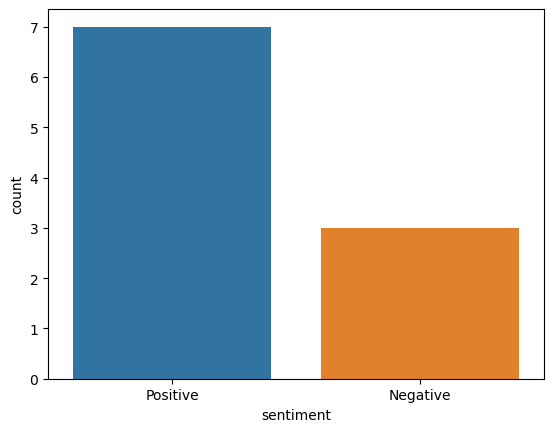

In [83]:
sns.countplot(x=df['sentiment'])

# inference 
we can see that out of 10 times 7 times is positive sentiment, 3 times is negative sentiment and no neutral sentiment